In [1]:
import os
import cv2
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from pathlib import Path
import glob
import scipy
tf.random.set_seed(23)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense,Input,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
from tensorflow.keras.layers import Flatten,Activation,Dropout,Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [3]:
data_dir = 'C:/Users/rupin/OneDrive/Desktop/Data mining/Assignment-1/images'
print(os.listdir(data_dir))
train = os.listdir(data_dir + "/train/")
valid = os.listdir(data_dir + "/validation/")
print(f'Train Classes - {train}')
print(f'Validation Classes - {valid}')

['train', 'validation']
Train Classes - ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Validation Classes - ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [4]:
train_dir='C:/Users/rupin/OneDrive/Desktop/Data mining/Assignment-1/images/train/'
test_dir='C:/Users/rupin/OneDrive/Desktop/Data mining/Assignment-1/images/validation'

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=128,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle='true')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=128,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle='false'
    )

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [16]:
no_of_classes=7
model=Sequential()

#adding first cnn layer
model.add(Conv2D(32,(3,3),padding='same',input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#adding second cnn layer
model.add(Conv2D(64,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#adding third cnn layer
model.add(Conv2D(128,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#adding fourth cnn layer
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))




model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))



In [23]:
model.add(Dense(no_of_classes, activation='softmax'))

opt=Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_26 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 activation_26 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 dropout_26 (Dropout)        (None, 48, 48, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_27 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                     

In [24]:
#Fit the model

from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint=ModelCheckpoint("./model.h5",monitor='val_acc',verbose=1,save_best_only=True)

early_stopping=EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,restore_best_weights=True)

reduce_learningrate=ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_delta=0.0001)
callbacks_list=[early_stopping,checkpoint,reduce_learningrate]

model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.01),metrics=['accuracy'])

In [25]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=70,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

C:\Users\rupin\AppData\Local\Temp\ipykernel_3440\901953066.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/38
225/225 [==============================] - ETA: 0s - loss: 1.6139 - accuracy: 0.3771WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 373s 2s/step - loss: 1.6139 - accuracy: 0.3771 - val_loss: 1.6330 - val_accuracy: 0.3389 - lr: 0.0100
Epoch 2/38
225/225 [==============================] - ETA: 0s - loss: 1.4188 - accuracy: 0.4677WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 306s 1s/step - loss: 1.4188 - accuracy: 0.4677 - val_loss: 1.5297 - val_accuracy: 0.4175 - lr: 0.0100
Epoch 3/38
225/225 [==============================] - ETA: 0s - loss: 1.3102 - accuracy: 0.5149WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 306s 1s/step - loss: 1.3102 - accuracy: 0.5149 - val_loss: 1.4906 - val_accuracy: 0.4534 - lr: 0.0100
Epoch 4/38
225/225 [==============================] - ETA: 0s - loss: 1.2341 - accuracy: 0.5452WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 314s 1s/step - loss: 1.2341 - accuracy: 0.5452 - val_loss: 1.4521 - val_accuracy: 0.4734 - lr: 0.0100
Epoch 5/38
225/225 [==============================] - ETA: 0s - loss: 1.1762 - accuracy: 0.5693WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 378s 2s/step - loss: 1.1762 - accuracy: 0.5693 - val_loss: 1.2784 - val_accuracy: 0.5378 - lr: 0.0100
Epoch 6/38
225/225 [==============================] - ETA: 0s - loss: 1.1156 - accuracy: 0.5955WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 369s 2s/step - loss: 1.1156 - accuracy: 0.5955 - val_loss: 1.2876 - val_accuracy: 0.5312 - lr: 0.0100
Epoch 7/38
225/225 [==============================] - ETA: 0s - loss: 1.0628 - accuracy: 0.6180WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 343s 2s/step - loss: 1.0628 - accuracy: 0.6180 - val_loss: 1.1774 - val_accuracy: 0.5759 - lr: 0.0100
Epoch 8/38
225/225 [==============================] - ETA: 0s - loss: 1.0042 - accuracy: 0.6429WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 341s 2s/step - loss: 1.0042 - accuracy: 0.6429 - val_loss: 1.2110 - val_accuracy: 0.5702 - lr: 0.0100
Epoch 9/38
225/225 [==============================] - ETA: 0s - loss: 0.9599 - accuracy: 0.6594WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 332s 1s/step - loss: 0.9599 - accuracy: 0.6594 - val_loss: 1.2759 - val_accuracy: 0.5516 - lr: 0.0100
Epoch 10/38
225/225 [==============================] - ETA: 0s - loss: 0.9021 - accuracy: 0.6825WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 327s 1s/step - loss: 0.9021 - accuracy: 0.6825 - val_loss: 1.1761 - val_accuracy: 0.5786 - lr: 0.0100
Epoch 11/38
225/225 [==============================] - ETA: 0s - loss: 0.8627 - accuracy: 0.7002WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 332s 1s/step - loss: 0.8627 - accuracy: 0.7002 - val_loss: 1.1471 - val_accuracy: 0.5884 - lr: 0.0100
Epoch 12/38
225/225 [==============================] - ETA: 0s - loss: 0.8074 - accuracy: 0.7229WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 330s 1s/step - loss: 0.8074 - accuracy: 0.7229 - val_loss: 1.2356 - val_accuracy: 0.5624 - lr: 0.0100
Epoch 13/38
225/225 [==============================] - ETA: 0s - loss: 0.7773 - accuracy: 0.7327WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 334s 1s/step - loss: 0.7773 - accuracy: 0.7327 - val_loss: 1.1495 - val_accuracy: 0.6001 - lr: 0.0100
Epoch 14/38
225/225 [==============================] - ETA: 0s - loss: 0.7254 - accuracy: 0.7534WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 325s 1s/step - loss: 0.7254 - accuracy: 0.7534 - val_loss: 1.1099 - val_accuracy: 0.6128 - lr: 0.0100
Epoch 15/38
225/225 [==============================] - ETA: 0s - loss: 0.6877 - accuracy: 0.7672WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 326s 1s/step - loss: 0.6877 - accuracy: 0.7672 - val_loss: 1.2510 - val_accuracy: 0.5893 - lr: 0.0100
Epoch 16/38
225/225 [==============================] - ETA: 0s - loss: 0.6535 - accuracy: 0.7785WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 334s 1s/step - loss: 0.6535 - accuracy: 0.7785 - val_loss: 1.1444 - val_accuracy: 0.6080 - lr: 0.0100
Epoch 17/38
225/225 [==============================] - ETA: 0s - loss: 0.6256 - accuracy: 0.7904Restoring model weights from the end of the best epoch: 14.



Epoch 17: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.
225/225 [==============================] - 319s 1s/step - loss: 0.6256 - accuracy: 0.7904 - val_loss: 1.1951 - val_accuracy: 0.6045 - lr: 0.0100
Epoch 17: early stopping


In [26]:
model.save_weights('face_emotion_model.h5')

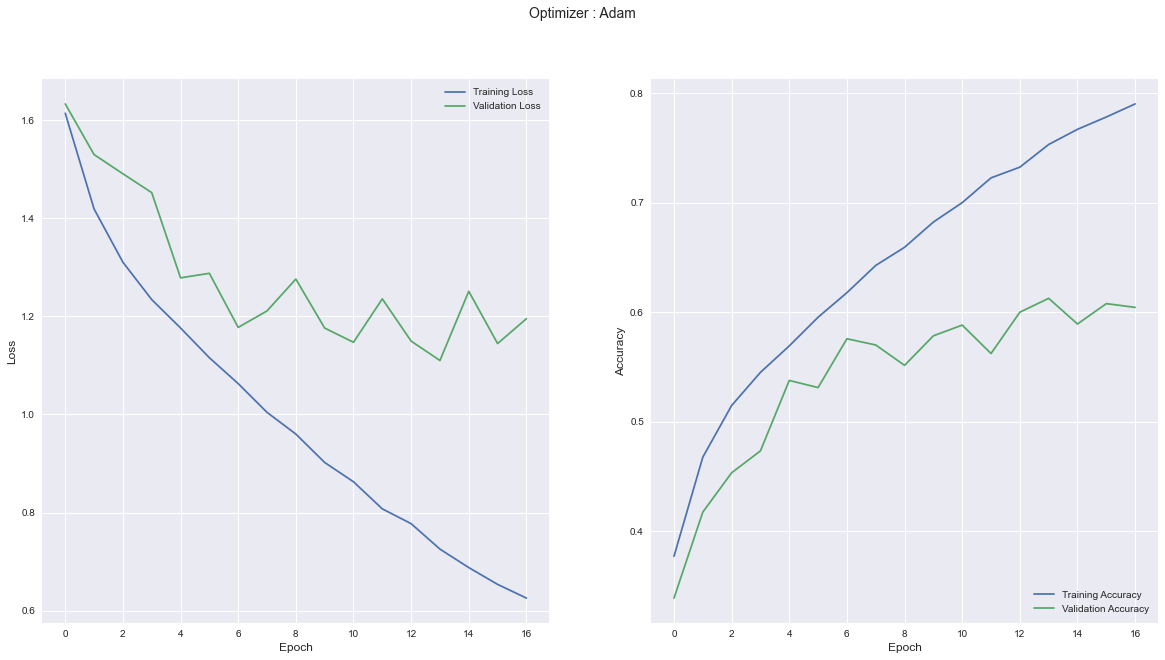

In [27]:
plt.style.use('seaborn')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.suptitle('Optimizer : Adam', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right')
plt.show()
